# Lista 4

### Zaimportowane biblioteki

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1

In [31]:
def f(x):
    return np.tan(np.pi-x)-x
def bisection(f, a, b):
    i = 0
    flops = 3
    fa = f(a)
    fb = f(b)
    if fa == 0.0:
        return a
    if fb == 0.0:
        return b
    m = a + (b-a)/2
    fm = f(m)
    while not np.isclose(fm, 0):
        if (abs(fm) > abs(fa)) and (abs(fm)>abs(fb)):
            print(f'W przedziale ({a}, {b}) występuje osobliwość')
            return None
        if (fa*fm>0) and (fb*fm>0):
            print(f'W przedziale ({a}, {b}) nie występuje pierwiastek równiania.')
            return None
        if fm*fb<0:
            a, fa = m, fm
            m = a + (b-a)/2
            fm = f(m)
        if fa*fm<0:
            b, fb = m, fm
            m = a + (b-a)/2
            fm = f(m)
        i += 1
        flops += 3
    return m, i, flops
    
x, iters, flops = bisection(f,4.91,4.95)
print(f"x: {x},\nf(x): {f(x)},\nliczba iteracji: {iters},\nflops: {flops}")

x: 4.9131804394722,
f(x): -9.75417080439911e-10,
liczba iteracji: 15,
flops: 48


In [32]:
def brent(f,a,b):
    i = 0
    flops = 22
    c = (a+b)/2
    fa = f(a)
    fb = f(b)
    fc = f(c)
    x = -(a*fb*fc*(fb-fc)+b*fc*fa*(fc-fa)+c*fa*fb*(fa-fb))/((fa-fb)*(fb-fc)*(fc-fa))
    fx = f(x)
    while not np.isclose(fx, 0):
        if fa*fc<0:
            b = c
            c = (a+b)/2
            fa = f(a)
            fb = f(b)
            fc = f(c)
            x = -(a*fb*fc*(fb-fc)+b*fc*fa*(fc-fa)+c*fa*fb*(fa-fb))/((fa-fb)*(fb-fc)*(fc-fa))
            fx = f(x)
        if fc*fb<0:
            a = c
            c = (a+b)/2
            fa = f(a)
            fb = f(b)
            fc = f(c)
            x = -(a*fb*fc*(fb-fc)+b*fc*fa*(fc-fa)+c*fa*fb*(fa-fb))/((fa-fb)*(fb-fc)*(fc-fa))
            fx = f(x)
        flops += 22
        i += 1
    return x, i, flops

    
x, iters, flops = brent(f,4.91,4.95)
print(f"x: {x},\nf(x): {f(x)},\nliczba iteracji: {iters},\nflops: {flops}")

x: 4.913180439263533,
f(x): 4.478997617241021e-09,
liczba iteracji: 4,
flops: 110


In [33]:
def secant(f,a,b):
    i = 0
    flops = 5
    x_k1 = a
    fxk1 = f(x_k1)
    fb=f(b)
    if fxk1*fb>0:
        print('Funkcja w punktach wytyczających cięciwe ma ten same znak')
    x_k = b - fb*(b-x_k1)/(f(b)-fxk1)
    fx = f(x_k)
    while not np.isclose(fx, 0, rtol=1e-10):
        x_k, x_k1 = x_k - fx*(x_k-x_k1)/(fx-fxk1), x_k
        fx, fxk1 = f(x_k), f(x_k1)       
        i += 1
        flops += 5 
    return x_k, i, flops

x, iters, flops = secant(f,4.91,4.95)
print(f"x: {x},\nf(x): {f(x)},\nliczba iteracji: {iters},\nflops: {flops}")

x: 4.913180439435718,
f(x): -2.1803892025218374e-11,
liczba iteracji: 3,
flops: 20


In [34]:
def f_prim(x):
    return -1 - (1/np.cos(x)**2)

def newton(f,b):
    i = 0
    flops = 2
    x = b-f(b)/f_prim(b)
    fx = f(x)
    while not np.isclose(fx, 0):
        b=x
        x = b-f(b)/f_prim(b)
        fx = f(x)
        i += 1
        flops += 2
        if i > 1000:
            raise ValueError("Metoda Newtona nie zbiega do rozwiązania z podanego punktu startowego.")
    return x, i, flops


x, iters, flops = newton(f,4.95)
print(f"x: {x},\nf(x): {f(x)},\nliczba iteracji: {iters},\nflops: {flops}")

x: 4.913180439434755,
f(x): 3.3635316754043743e-12,
liczba iteracji: 3,
flops: 8


### Zadanie 2

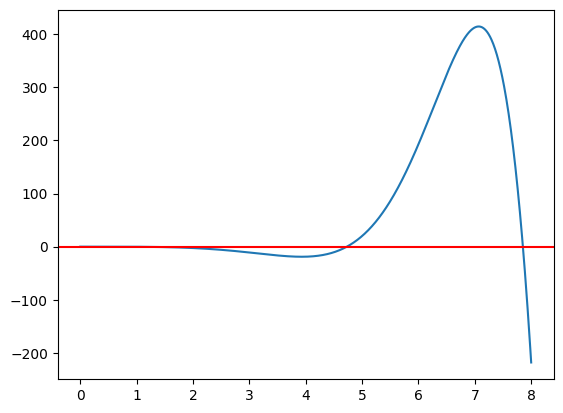

In [35]:
def f(x):
    return np.cosh(x)*np.cos(x)-1

x = np.linspace(0,8,1000)
plt.plot(x, f(x))
plt.axhline(0, xmin=0, xmax=8, color='r')

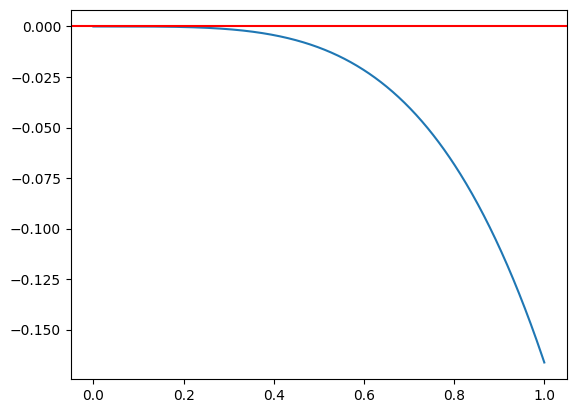

In [36]:
x = np.linspace(0,1,1000)
plt.plot(x, f(x))
plt.axhline(0, xmin=0, xmax=1, color='r')

In [37]:
newton(f,4)

C:\Users\marci\AppData\Local\Temp\ipykernel_8600\3476643277.py:2: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x)*np.cos(x)-1
C:\Users\marci\AppData\Local\Temp\ipykernel_8600\3476643277.py:2: RuntimeWarning: invalid value encountered in cos
  return np.cosh(x)*np.cos(x)-1


ValueError: Metoda Newtona nie zbiega do rozwiązania z podanego punktu startowego.

### Zadanie 3

70.87797226783152 -2.0371544451336376e-09


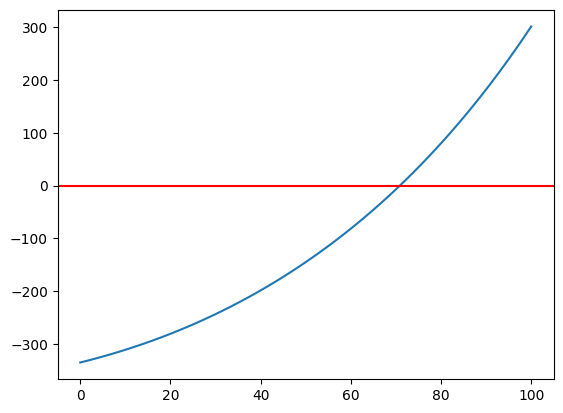

In [39]:
#Constants
U = 2510
M0 = 2.8*10**6
M = 13.3*10**3
G=9.81
V = 335

def f(t):
    return U*np.log(M0/(M0-M*t))-G*t-V

t = np.linspace(0,100,100)
plt.plot(t,f(t))
plt.axhline(0, c='r')
x, iters, flops = secant(f,0.01,100)
print(x, f(x))


### Zadanie 4

C:\Users\marci\AppData\Local\Temp\ipykernel_8600\1063956494.py:7: RuntimeWarning: divide by zero encountered in log
  return -R*T*np.log((T/T0)**(5/2))-G
C:\Users\marci\AppData\Local\Temp\ipykernel_8600\1063956494.py:7: RuntimeWarning: invalid value encountered in multiply
  return -R*T*np.log((T/T0)**(5/2))-G


904.9425832328213 7.770722731947899e-09


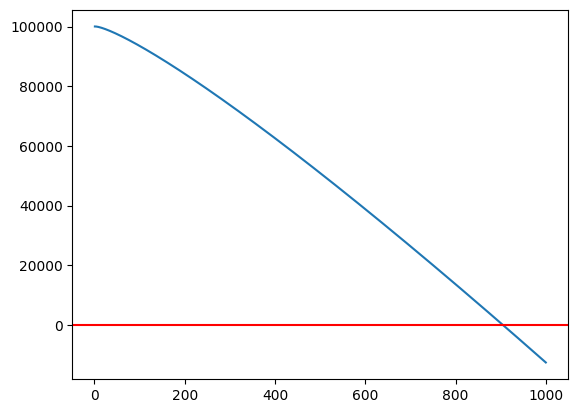

In [40]:
### Constants
G = -10**5
R = 8.31441
T0 = 4.44418

def f(T):
    return -R*T*np.log((T/T0)**(5/2))-G 

t = np.linspace(0,1000,1000)
plt.plot(t,f(t))
plt.axhline(0, c='r')
x, iters, flops = secant(f,900,1000)
print(x, f(x))

### Zadanie 5

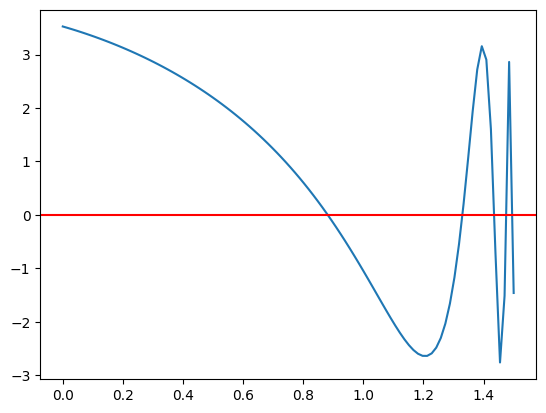

In [41]:
xs = np.linspace(0,1.5,100)
plt.plot(xs, np.cos(xs)-3*np.sin(np.tan(xs)-1))
plt.axhline(0, xmin=0.0, xmax=1.5, c='r')

In [42]:
def function(arr):
    x = arr[0]
    y = arr[1]
    return [[np.tan(x)-y-1],[np.cos(x)-3*np.sin(y)]]

def jacobian(arr):
    x = arr[0]
    y = arr[1]
    return [[1/(np.cos(x)**2), -1], [-np.sin(x), -3*np.cos(y)]]

def newton_iter(initialGuess, function, Jacobian):
    x = initialGuess
    f = function(x)
    fx = f[0][0]
    fy = f[1][0]
    J = Jacobian(x)
    while not (np.isclose(fx,0) and np.isclose(fy,0)):
        x = x - (np.linalg.inv(J)@f).flatten()
        f = function(x)
        fx = f[0][0]
        fy = f[1][0]
        J = Jacobian(x)
    return x


In [44]:
initial_guesses = [[0.5, -0.5],[1.33, 3.06],[1.43, 6.32],[1.47, 9.39],[1.5, 12.6]]
for guess in initial_guesses:
    x, y = newton_iter(np.array(guess), function, jacobian)
    print(f"Initial guess: X:{guess[0]}, Y:{guess[1]}")
    print(f"Wartość wyznaczonego X: {x}")
    print(f"Wartość wyznaczonego Y: {y}")
    print(f"Wartość pierwszej funkcji w tym punkcie: {function([x,y])[0][0]:.2f}")
    print(f"Wartość drugiej funkcji w tym punkcie: {function([x,y])[1][0]:.2f}")


Initial guess: X:0.5, Y:-0.5
Wartość wyznaczonego X: 0.8815925945174163
Wartość wyznaczonego Y: 0.21359471456799975
Wartość pierwszej funkcji w tym punkcie: 0.00
Wartość drugiej funkcji w tym punkcie: -0.00
Initial guess: X:1.33, Y:3.06
Wartość wyznaczonego X: 1.3294021265416869
Wartość wyznaczonego Y: 3.0618225358080395
Wartość pierwszej funkcji w tym punkcie: 0.00
Wartość drugiej funkcji w tym punkcie: -0.00
Initial guess: X:1.43, Y:6.32
Wartość wyznaczonego X: 1.43517609535858
Wartość wyznaczonego Y: 6.328268868969873
Wartość pierwszej funkcji w tym punkcie: 0.00
Wartość drugiej funkcji w tym punkcie: -0.00
Initial guess: X:1.47, Y:9.39
Wartość wyznaczonego X: 1.4748716040445735
Wartość wyznaczonego Y: 9.3928466411273
Wartość pierwszej funkcji w tym punkcie: 0.00
Wartość drugiej funkcji w tym punkcie: -0.00
Initial guess: X:1.5, Y:12.6
Wartość wyznaczonego X: 1.497349673710565
Wartość wyznaczonego Y: 12.590833266555835
Wartość pierwszej funkcji w tym punkcie: 0.00
Wartość drugiej fu

### Zadanie 6

In [45]:
def polynomial(x):
    return x**4 + (5+1j)*x**3 - (8-5j)*x**2 + (30-14j)*x-84

def first_der(x):
    return 4*x**3 + (15+3j)*x**2 - (16-10j)*x + 30 - 14j

def second_der(x):
    return 12*x**2 + (30+6j)*x -16 + 10j


def laguerre(initial_guess, poly):
    x = initial_guess
    n = 4
    fx = poly(x)
    h = (n-1)**2 * first_der(x)**2 - n*(n-1)*fx*second_der(x)
    while not np.isclose(fx, 0):
        x1 = x - n*fx/(first_der(x)+np.sqrt(h))
        x2 = x - n*fx/(first_der(x)-np.sqrt(h))
        if np.abs(x1-x)<=np.abs(x2-x):
            x = x1
        else:
            x = x2
        fx = poly(x)
        h = (n-1)**2 * first_der(x)**2 - n*(n-1)*fx*second_der(x)
    return x


In [46]:
initial_guesses = [3, -8, 2.1j, -4j]
for guess in initial_guesses:
    x = laguerre(guess, polynomial)
    print(f"Initial guess: {guess}")
    print(f"Wartość wyznaczonego X: {x:.2f}")
    print(f"Wartość funkcji w tym punkcie: {polynomial(x):.2f}")

Initial guess: 3
Wartość wyznaczonego X: 2.00+0.00j
Wartość funkcji w tym punkcie: 0.00+0.00j
Initial guess: -8
Wartość wyznaczonego X: -7.00-0.00j
Wartość funkcji w tym punkcie: 0.00+0.00j
Initial guess: 2.1j
Wartość wyznaczonego X: 0.00+2.00j
Wartość funkcji w tym punkcie: -0.00-0.00j
Initial guess: (-0-4j)
Wartość wyznaczonego X: -0.00-3.00j
Wartość funkcji w tym punkcie: 0.00+0.00j
